In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## EDA

In [132]:
df = pd.read_csv('dataproject2025.csv')
df.head()

,Unnamed: 0,issue_d,loan duration,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,dti,emp_length,...,purpose,revol_bal,revol_util,sub_grade,target,tax_liens,zip_code,Pct_afro_american,Predictions,Predicted probabilities
0,0,2013,0,39600.0,1379.0,21564.0,16.1,0.0,2.49,2 years,...,home_improvement,4136.0,16.1,B2,0,0.0,782,7.388592,0,0.053051
1,1,2013,0,55000.0,9570.0,16473.0,53.9,0.0,22.87,10+ years,...,debt_consolidation,36638.0,61.2,B2,0,0.0,481,9.745456,0,0.084507
2,2,2013,0,325000.0,53306.0,13901.0,67.1,0.0,18.55,5 years,...,debt_consolidation,29581.0,54.6,A3,0,0.0,945,7.542862,0,0.037206
3,3,2013,0,130000.0,36362.0,3567.0,93.0,0.0,13.03,10+ years,...,debt_consolidation,10805.0,67.0,B3,0,0.0,809,6.598132,0,0.061371
4,4,2013,1,73000.0,24161.0,4853.0,74.7,1.0,23.13,6 years,...,debt_consolidation,27003.0,82.8,D5,1,0.0,802,7.058900,1,0.345896


In [133]:
#df.describe()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086236 entries, 0 to 1086235
Data columns (total 39 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1086236 non-null  int64  
 1   issue_d                  1086236 non-null  int64  
 2   loan duration            1086236 non-null  int64  
 3   annual_inc               1086236 non-null  float64
 4   avg_cur_bal              1086236 non-null  float64
 5   bc_open_to_buy           1086236 non-null  float64
 6   bc_util                  1086236 non-null  float64
 7   delinq_2yrs              1086236 non-null  float64
 8   dti                      1086236 non-null  float64
 9   emp_length               1086236 non-null  object 
 10  emp_title                1086236 non-null  object 
 11  fico_range_high          1086236 non-null  float64
 12  funded_amnt              1086236 non-null  float64
 13  grade                    1086236 non-null 

In [135]:
target_counts = df['Predictions'].value_counts()
target_pct = df['Predictions'].value_counts(normalize=True) * 100
target_pct

Predictions
0    81.13016
1    18.86984
Name: proportion, dtype: float64

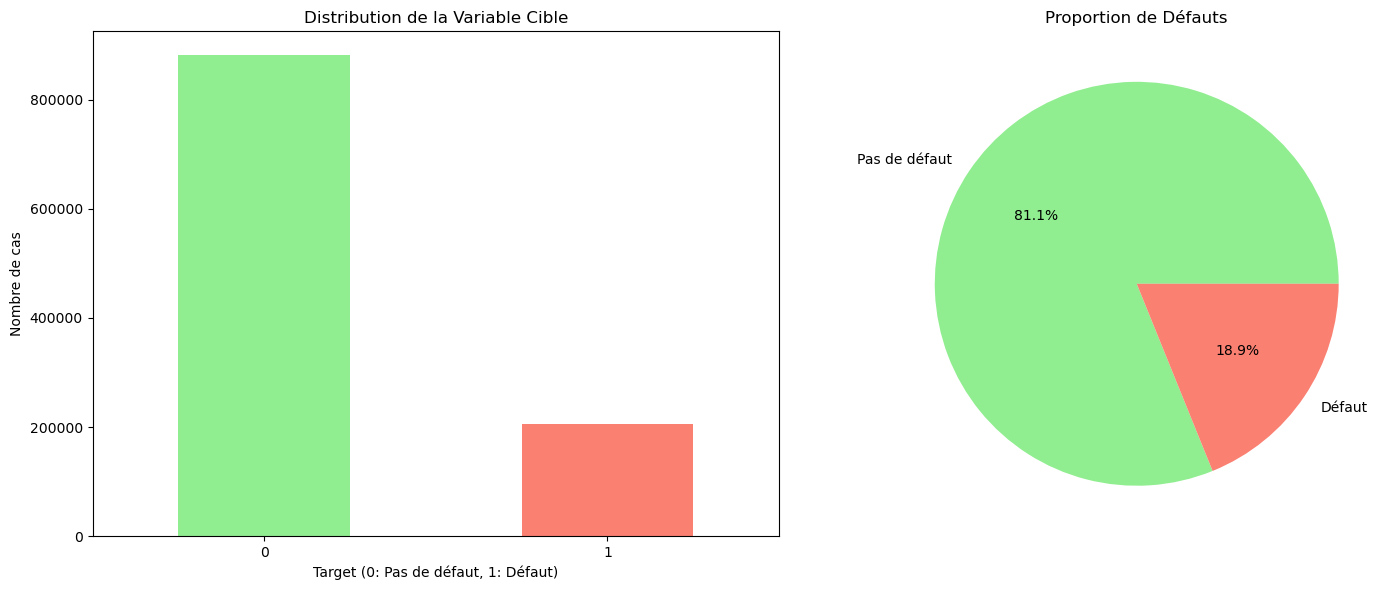

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique en barres
target_counts.plot(kind='bar', ax=ax1, color=['lightgreen', 'salmon'])
ax1.set_title('Distribution de la Variable Cible')
ax1.set_xlabel('Target (0: Pas de défaut, 1: Défaut)')
ax1.set_ylabel('Nombre de cas')
ax1.tick_params(axis='x', rotation=0)

# Graphique en camembert
ax2.pie(target_counts.values, labels=['Pas de défaut', 'Défaut'], 
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
ax2.set_title('Proportion de Défauts')

plt.tight_layout()
plt.show()

In [137]:
#df.isna().sum()
# NO missing values

In [138]:
target_col = 'target'
numerical_columns = df.select_dtypes(include = [np.number]).columns.to_list()
numerical_columns.remove('target')


In [139]:
categorical_columns = df.select_dtypes(object).columns.to_list()
categorical_columns,

(['emp_length',
  'emp_title',
  'grade',
  'home_ownership',
  'purpose',
  'sub_grade'],)

In [140]:
print(f"Variables numériques ({len(numerical_columns)}): {numerical_columns}")
print(f"Variables catégorielles ({len(categorical_columns)}): {categorical_columns}")

Variables numériques (32): ['Unnamed: 0', 'issue_d', 'loan duration', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_2yrs', 'dti', 'fico_range_high', 'funded_amnt', 'inq_last_6mths', 'int_rate', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_rev_accts', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'tax_liens', 'zip_code', 'Pct_afro_american', 'Predictions', 'Predicted probabilities']
Variables catégorielles (6): ['emp_length', 'emp_title', 'grade', 'home_ownership', 'purpose', 'sub_grade']


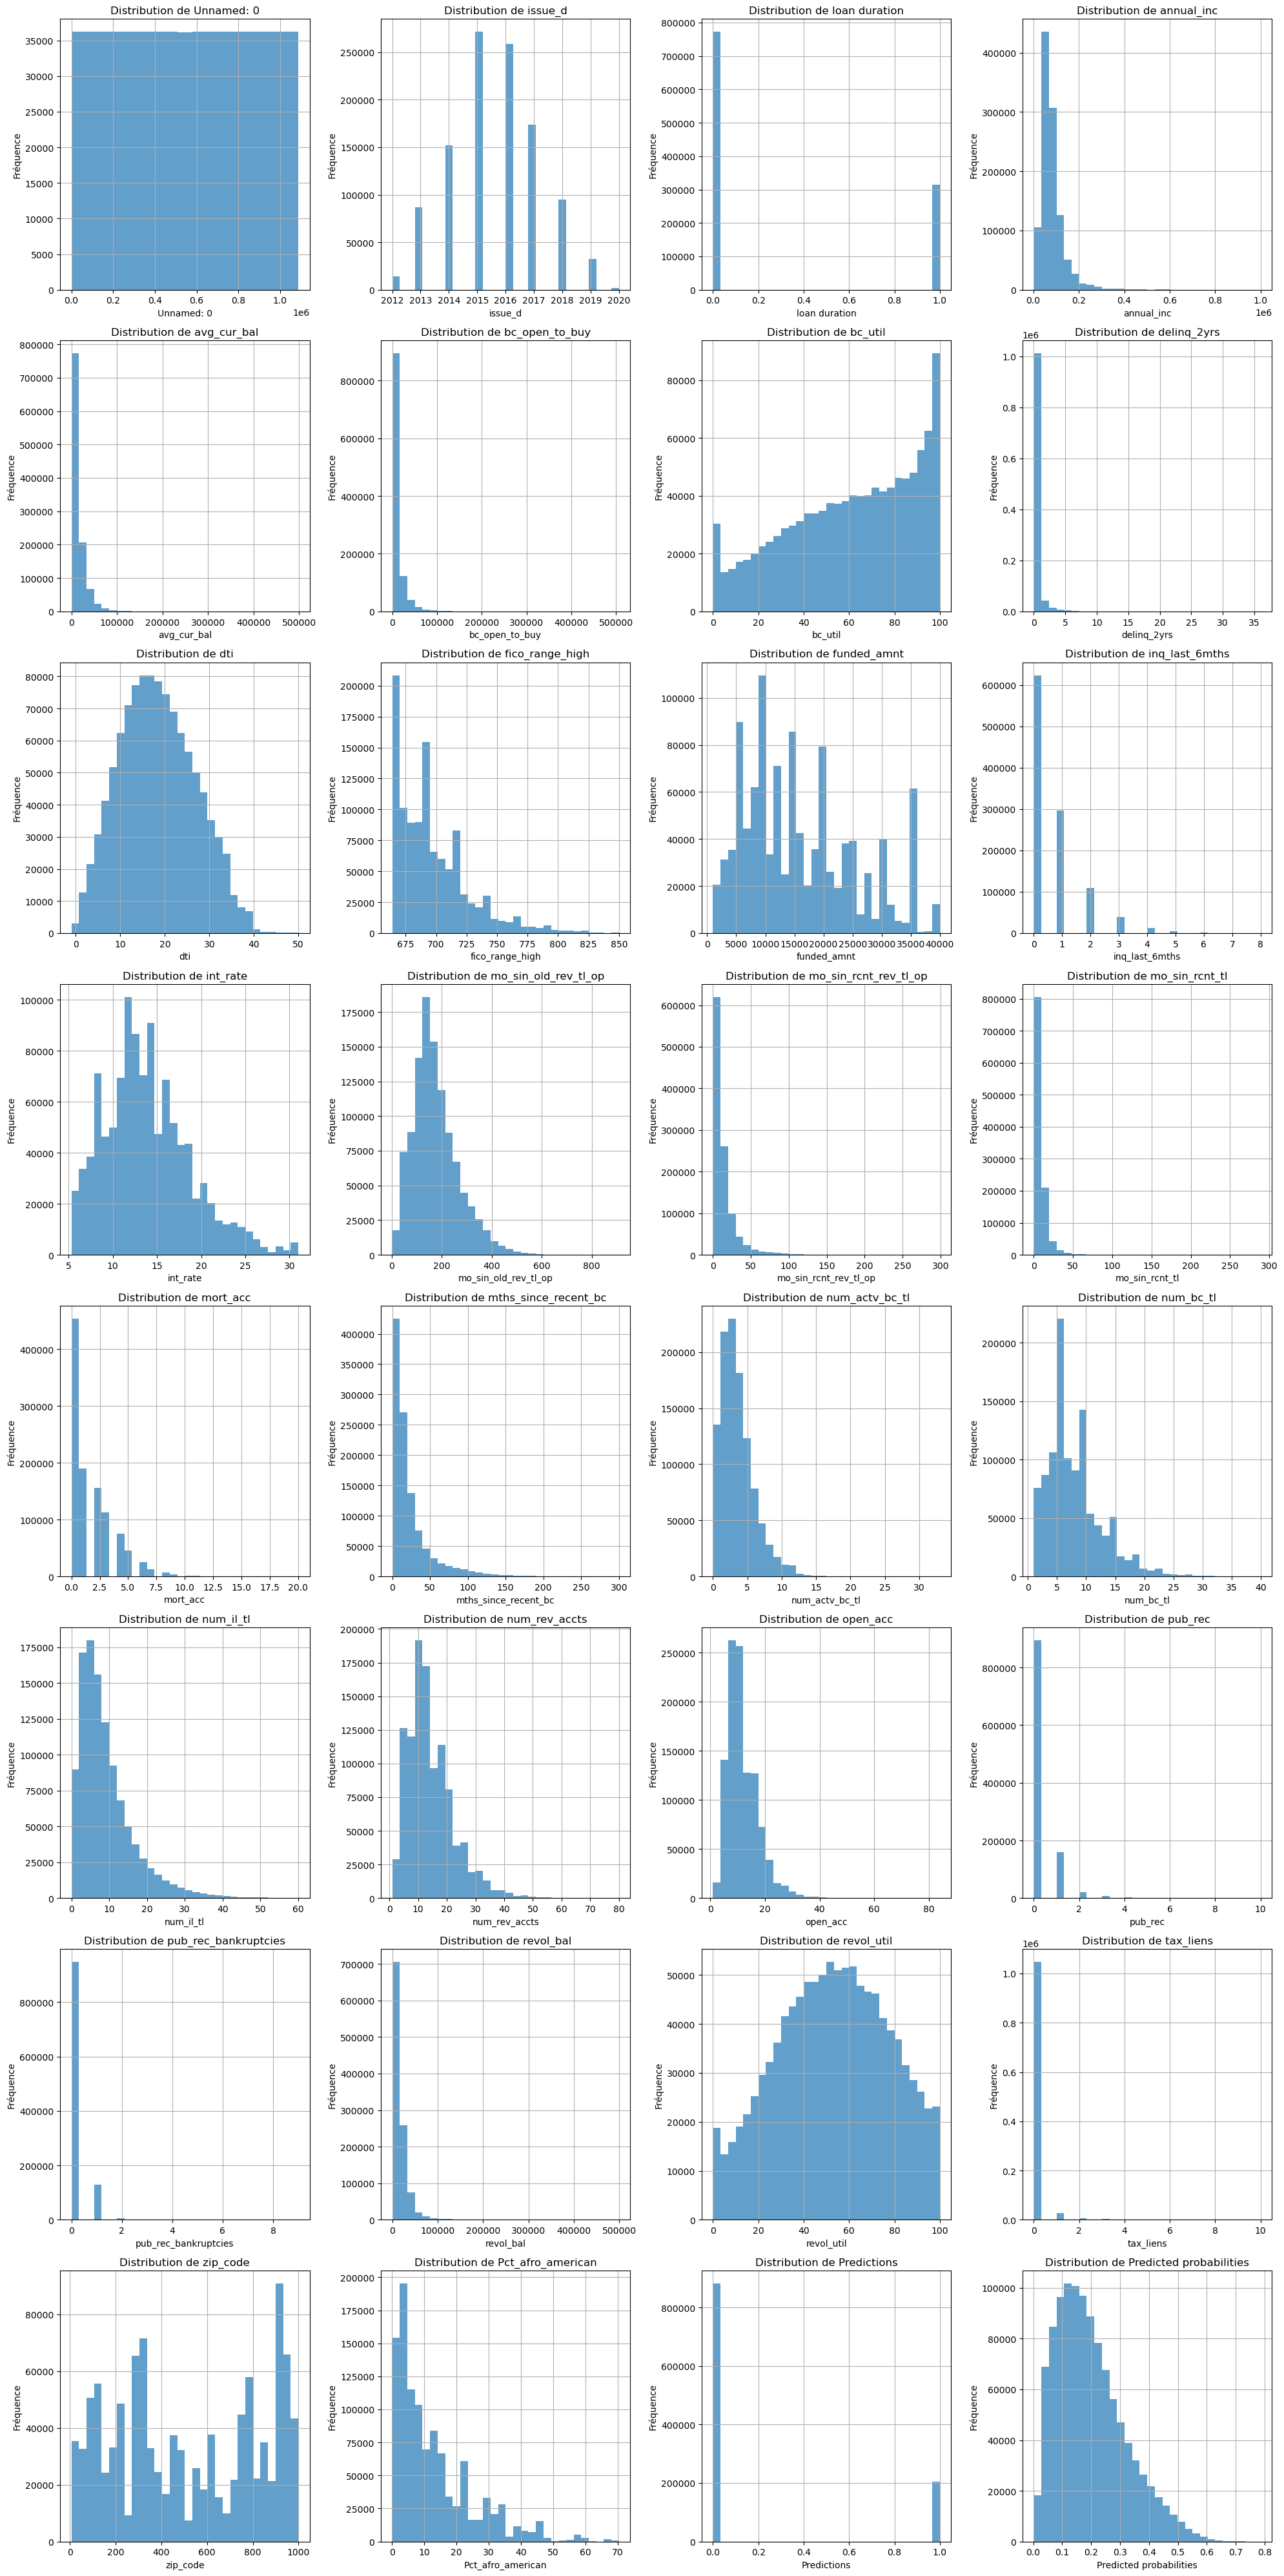

In [141]:
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numerical_columns):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fréquence')

# Masquer les axes non utilisés
for i in range(len(numerical_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [142]:
correlation_matrix = df[numerical_columns + ['target']].corr()
print("Corrélations avec la variable cible:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr[target_corr.index != 'target'])

Corrélations avec la variable cible:
Predicted probabilities    0.299189
int_rate                   0.249784
Predictions                0.232936
loan duration              0.171470
dti                        0.087758
inq_last_6mths             0.065550
funded_amnt                0.057124
bc_util                    0.037924
num_actv_bc_tl             0.036675
issue_d                    0.034241
revol_util                 0.030390
open_acc                   0.027420
pub_rec_bankruptcies       0.023504
Pct_afro_american          0.021273
pub_rec                    0.019962
delinq_2yrs                0.010058
num_il_tl                  0.006126
tax_liens                  0.004184
Unnamed: 0                -0.004046
num_rev_accts             -0.004837
zip_code                  -0.014044
num_bc_tl                 -0.014681
revol_bal                 -0.035916
annual_inc                -0.056563
mo_sin_rcnt_rev_tl_op     -0.057703
mo_sin_rcnt_tl            -0.058214
mths_since_recent_bc      -

In [143]:
print("Moyennes des variables numériques par classe:")
comparison = df.groupby('target')[numerical_columns].mean()
print(comparison.T)

Moyennes des variables numériques par classe:
target                               0              1
Unnamed: 0               543992.866339  540879.224459
issue_d                    2015.581832    2015.711692
loan duration                 0.248996       0.439689
annual_inc                83576.254943   75649.080377
avg_cur_bal               14394.118101   11186.086246
bc_open_to_buy            10622.319877    8093.303086
bc_util                      60.171473      62.787170
delinq_2yrs                   0.332074       0.354510
dti                          18.004418      19.824167
fico_range_high             698.521036     690.892096
funded_amnt               15645.325786   16966.190389
inq_last_6mths                0.619176       0.769825
int_rate                     13.225243      16.203222
mo_sin_old_rev_tl_op        178.503158     164.123504
mo_sin_rcnt_rev_tl_op        13.475703      11.183172
mo_sin_rcnt_tl                7.980503       6.750695
mort_acc                      1.6833

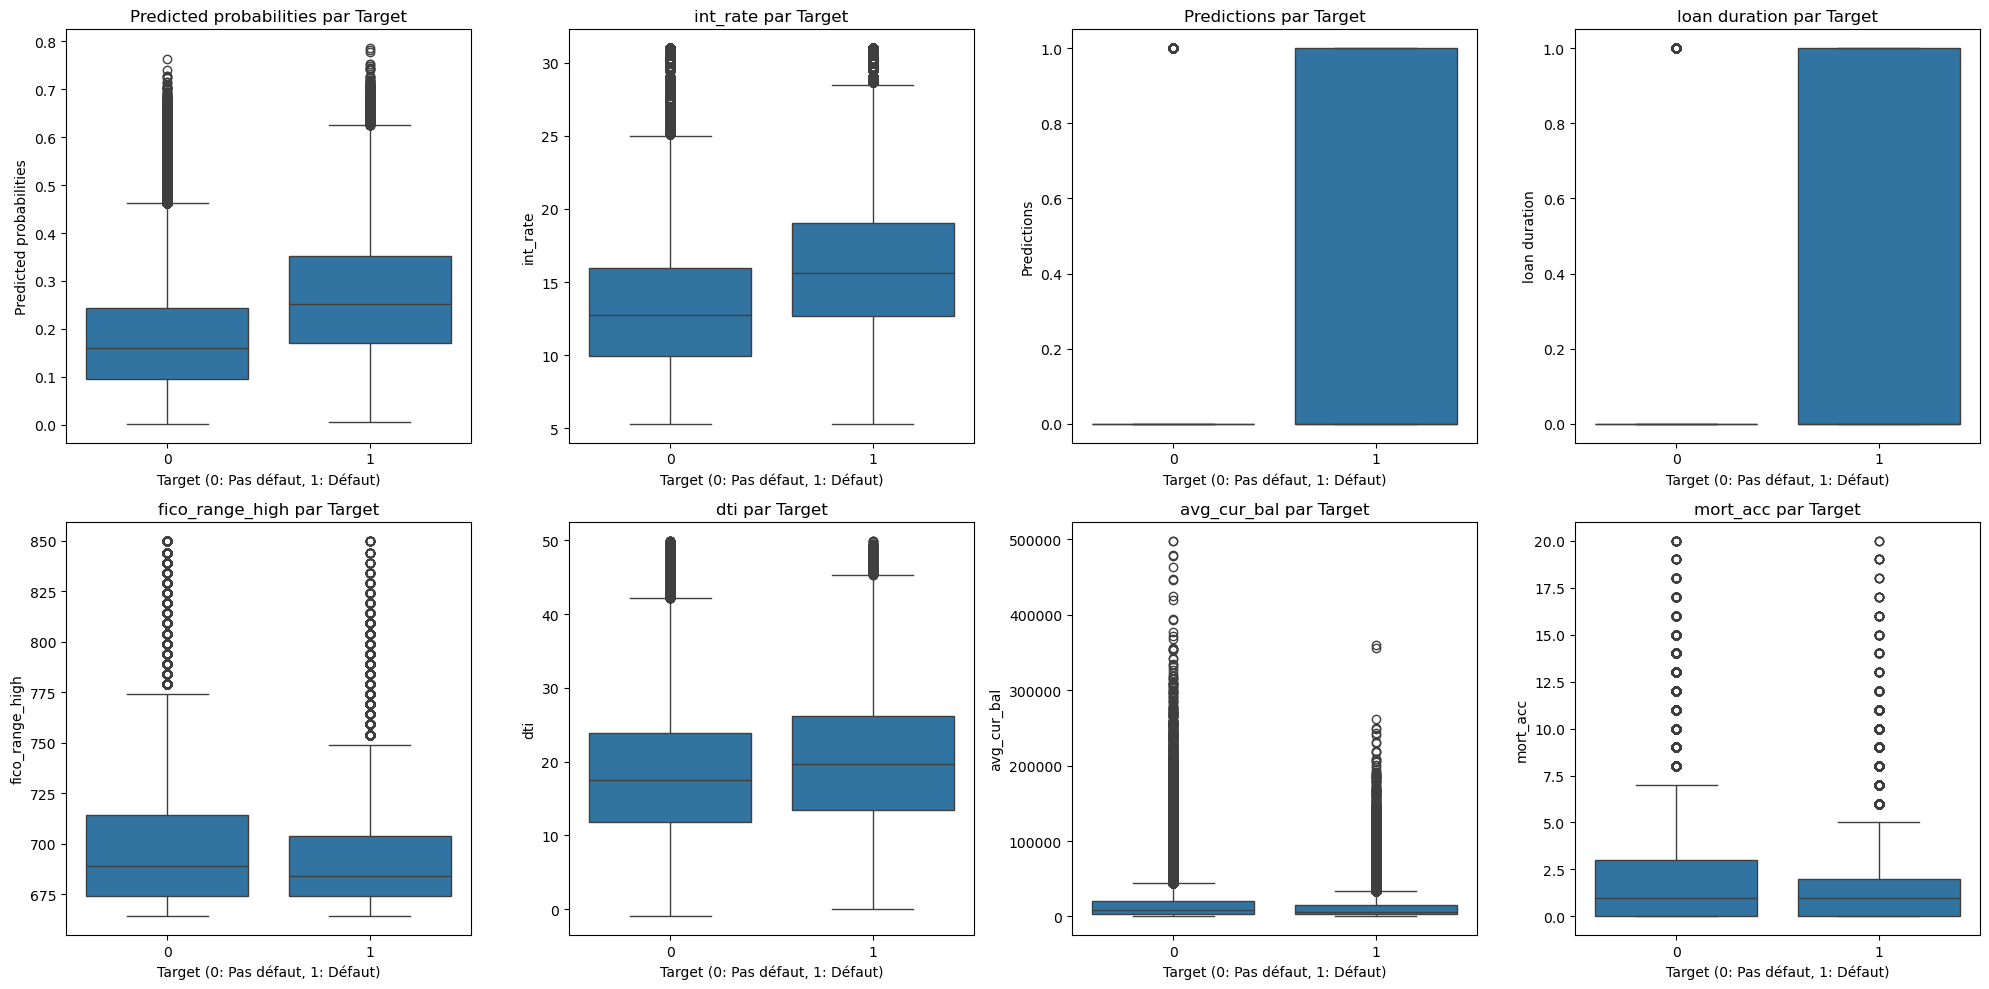

In [144]:
import seaborn as sns
top_corr_vars = target_corr[target_corr.index != 'target'].abs().nlargest(8).index

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(top_corr_vars):
    sns.boxplot(data=df, x='target', y=col, ax=axes[i])
    axes[i].set_title(f'{col} par Target')
    axes[i].set_xlabel('Target (0: Pas défaut, 1: Défaut)')

plt.tight_layout()
plt.show()

In [145]:
#df = df.drop(columns = ['Unnamed: 0','Predicted probabilities', 'Predictions', 'Pct_afro_american', 'zip_code'] )